In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 1 - Import Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

## Data understanding

Train Size:
(50000, 32, 32, 3)
(50000, 1)
Test Size:
(10000, 32, 32, 3)
(10000, 1)


Text(0.5, 1.0, 'automobile')

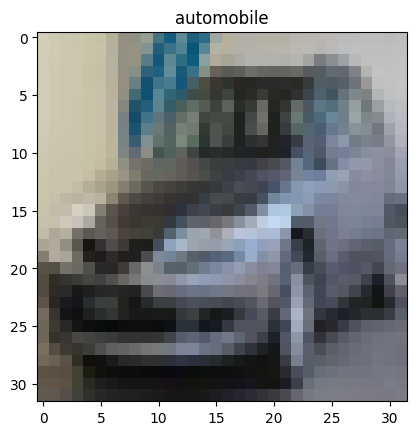

In [3]:
print("Train Size:")
print(x_train.shape)
print(y_train.shape)
print("Test Size:")
print(x_test.shape)
print(y_test.shape)

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(low= 0, high=50000)
plt.imshow(x_train[idx])
plt.title(label_names[int(y_train[idx])])

# 2- Preprocess data

In [4]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [5]:
X_train = x_train/255.0
X_test = x_test/255.0

Y_train = tf.keras.utils.to_categorical(np.squeeze(y_train), 10)
Y_test = tf.keras.utils.to_categorical(np.squeeze(y_test), 10)

print(Y_train.shape)
print(Y_test.shape)

(50000, 10)
(10000, 10)


# 3- Model development
Conv Layers:

1- 32 filter 3x3 + relu

2- 32 filter 3x3 + relu

3- max pooling 2x2

4- 64 filter 3x3 + relu

5- 64 filter 3x3 + relu

6- max pooling 2x2

7- 128 filter 3x3 + relu

8- 128 filter 3x3 + relu

# Classification Head

9- Flattening

10- Dense 128

11: dense 10


In [6]:
def create_model():
    model = tf.keras.models.Sequential()
    
    # Feature extractor
    model.add(tf.keras.layers.Conv2D(32, 3, padding="same", activation = 'relu', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.Conv2D(32, 3, padding="same", activation = 'relu'))
    model.add(tf.keras.layers.MaxPool2D(2,2))
    
    model.add(tf.keras.layers.Conv2D(64, 3, padding="same", activation = 'relu'))
    model.add(tf.keras.layers.Conv2D(64, 3, padding="same", activation = 'relu'))
    model.add(tf.keras.layers.MaxPool2D(2,2))
    
    model.add(tf.keras.layers.Conv2D(128, 3, padding="same", activation = 'relu'))
    model.add(tf.keras.layers.Conv2D(128, 3, padding="same", activation = 'relu'))
    
    # classification head
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

model = create_model()



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

## Set cost- evaluation metric- optimizer
    - set otimizer to adam with learning rate 1e-3
    - set appropriate loss
    - set appropriate metric

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=tf.keras.metrics.CategoricalAccuracy())

early_stop_callback = tf.keras.callbacks.EarlyStopping( monitor="val_loss", patience=2)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

# 4- Triain model
    - set batch_size to 32
    - set the validation set to 10% of training data
    - train for 10 epochs

In [9]:
hist = model.fit(X_train, Y_train, validation_split=0.1, epochs=10, callbacks=[early_stop_callback, tensorboard_callback])

Epoch 1/10
1407/1407 [==============================] - 56s 36ms/step - loss: 1.5193 - categorical_accuracy: 0.4435 - val_loss: 1.1020 - val_categorical_accuracy: 0.6072
Epoch 2/10
1407/1407 [==============================] - 48s 34ms/step - loss: 1.0190 - categorical_accuracy: 0.6393 - val_loss: 0.9806 - val_categorical_accuracy: 0.6680
Epoch 3/10
1407/1407 [==============================] - 46s 33ms/step - loss: 0.8119 - categorical_accuracy: 0.7149 - val_loss: 0.7962 - val_categorical_accuracy: 0.7208
Epoch 4/10
1407/1407 [==============================] - 46s 32ms/step - loss: 0.6832 - categorical_accuracy: 0.7593 - val_loss: 0.7748 - val_categorical_accuracy: 0.7300
Epoch 5/10
1031/1407 [====================>.........] - ETA: 12s - loss: 0.5608 - categorical_accuracy: 0.8038

KeyboardInterrupt: 

## Analyze training curve

In [ ]:
fig, axs = plt.subplots(2,1)
axs[0].plot(hist.history['loss'])
axs[0].plot(hist.history['val_loss'])

axs[1].plot(hist.history['categorical_accuracy'])
axs[1].plot(hist.history['val_categorical_accuracy'])


# 5- Evaluate model

In [ ]:
model.evaluate(X_test,Y_test)

#  ============== Use Data Augmentation ==============

# Data Augmentation
    - use ImageDataGenerator from tensorflow.keras.preprocessing.image
    - create an object from ImageDataGenerator with validation_split=0.2 and 
        - rotation_range=20,
        - width_shift_range=0.2
        - height_shift_range=0.2
        - horizontal_flip=True
     - fit the data_gen_train to taining data

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen_train = ImageDataGenerator(rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.2)
data_gen_train.fit(X_train)


In [12]:
img_it = data_gen_train.flow(X_train, batch_size=10)
    

(10, 32, 32, 3)


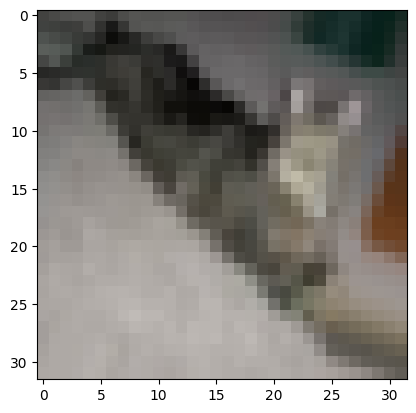

In [16]:
for img_batch in img_it:
    print(img_batch.shape)
    plt.imshow(img_batch[0])
    break

# Create another model

In [17]:
model_with_augmentation = create_model()
model_with_augmentation.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                                loss=tf.keras.losses.CategoricalCrossentropy(),
                                metrics=tf.keras.metrics.CategoricalAccuracy())

# Train model

In [18]:
hist = model_with_augmentation.fit(data_gen_train.flow(X_train, Y_train, batch_size=32,subset='training'),
                                   validation_data=data_gen_train.flow(X_train, Y_train,batch_size=32, subset='validation'),
                                   epochs = 20)

Epoch 1/20
1250/1250 [==============================] - 78s 62ms/step - loss: 1.7926 - categorical_accuracy: 0.3316 - val_loss: 1.5021 - val_categorical_accuracy: 0.4363
Epoch 2/20
1250/1250 [==============================] - 80s 64ms/step - loss: 1.4017 - categorical_accuracy: 0.4863 - val_loss: 1.2654 - val_categorical_accuracy: 0.5432
Epoch 3/20
1250/1250 [==============================] - 76s 60ms/step - loss: 1.2442 - categorical_accuracy: 0.5504 - val_loss: 1.1618 - val_categorical_accuracy: 0.5711
Epoch 4/20
1250/1250 [==============================] - 77s 62ms/step - loss: 1.1344 - categorical_accuracy: 0.5950 - val_loss: 1.0881 - val_categorical_accuracy: 0.6107
Epoch 5/20
1250/1250 [==============================] - 80s 64ms/step - loss: 1.0616 - categorical_accuracy: 0.6238 - val_loss: 1.0535 - val_categorical_accuracy: 0.6251
Epoch 6/20
1250/1250 [==============================] - 115s 92ms/step - loss: 1.0074 - categorical_accuracy: 0.6429 - val_loss: 0.9771 - val_categori

# Training curve

In [ ]:
fig, axs = plt.subplots(2,1)
axs[0].plot(hist.history['loss'])
axs[0].plot(hist.history['val_loss'])

axs[1].plot(hist.history['categorical_accuracy'])
axs[1].plot(hist.history['val_categorical_accuracy'])

## Evaluate model

In [ ]:
model.evaluate(X_test,Y_test)